## [ডিসিশন ট্রি কিভাবে কাজ করে? খালি চোখে আইরিস ডেটাসেট](https://github.com/raqueeb/ml-python/blob/master/colab/decision_tree.ipynb)

#### কেন ডিসিশন ট্রি?

অনেক অ্যালগরিদম নিয়ে কাজ করা হয়েছে এর মধ্যে। সেদিক থেকে মানুষকে বোঝানোর জন্য আমার প্রিয় একটা মডেল হচ্ছে এই ডিসিশন ট্রি। এটা মানুষের বোঝার মতো করে খুবই সহজ ক্লাসিফিকেশন/রিগ্রেশন রুলগুলো দেখিয়ে দেয় আমাদের। আমার আগের বইটাতে এই ডিসিশন ট্রি নিয়ে একটা বড় চ্যাপ্টার লিখেছিলাম। যেহেতু পুরো বইটা আছে ইন্টারনেটে, দেখে নিতে পারেন একটু। তবে না দেখলে সমস্যা নেই। আমি এখানে সে জিনিসটা কাভার করে দেব পাইথনের লাইব্রেরি দিয়ে।

পৃথিবীর এই অসম্ভব জনপ্রিয় এবং প্রচন্ড ক্ষমতাশালী অ্যালগরিদম ‘র‌্যান্ডম ফরেস্টে’র মূল ভিত্তি কিন্তু এসেছে এই ‘ডিসিশন ট্রি’ থেকে। আর সেকারণে এই চ্যাপ্টারে আমরা দেখাবো কিভাবে একটা ডিসিশন ট্রি ব্যবহার করে এই আইরিস ডেটা সেটের প্রেডিকশন করতে হয়। এর অর্থ হচ্ছে একটা ‘এন্ড টু এন্ড’ ডেমনস্ট্রেশন। আমাদের সাইকিট-লার্ন এখানে একটা ‘কার্ট’ - ‘ক্লাসিফিকেশন এন্ড রিগ্রেশন ট্রি’ অ্যালগরিদম ব্যবহার করে যেই সিদ্ধান্তের গাছগুলোকে বড় করার জন্য, যেটা আসলে একটা বাইনারি ট্রি।

এখানে পাতা ছাড়া (লীফ নয়) নোডগুলোতে সব সময় দুটো চিল্ড্রেন থাকে। এর মানে হচ্ছে শুধুমাত্র প্রশ্নের হ্যাঁ অথবা না উত্তর এর উপর ভিত্তি করে সিদ্ধান্তের গাছটা বড় হতে থাকে। অরালিয়েন জেরোনের বইটা থেকে নিয়ে এলাম ধারণাটাকে। হাতেকলমের জন্য একটা অসাধারণ বই।

#### হাতেকলমে ডিসিশন ট্রি

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris=load_iris()

In [3]:
X=iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# আমরা একটা ফিচার নেই,পেটাল প্রস্থ - নামপাই এর অ্যারে স্লাইসিং করে 
X=iris.data[:,3:]
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [5]:
# আমরা একটা ফিচার নেই,পেটাল প্রস্থ - নামপাই এর অ্যারে স্লাইসিং করে 
X=iris.data[:,3:4]
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [6]:
# আমরা শেষ দুটো ফিচার নেই, একটা পেটাল দৈর্ঘ্য আর পেটাল প্রস্থ 
X=iris.data[:,2:] # [row,col]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
# আমরা শেষ দুটো ফিচার নেই, একটা পেটাল দৈর্ঘ্য আর পেটাল প্রস্থ 
X=iris.data[:,2:4]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [8]:
# train the data set
y=iris.target

#depth =2
tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42).fit(X, y)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Let's make the picture

In [9]:
from sklearn.tree import export_graphviz
#from graphviz import Source

export_graphviz(
        tree_clf,
        out_file='tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

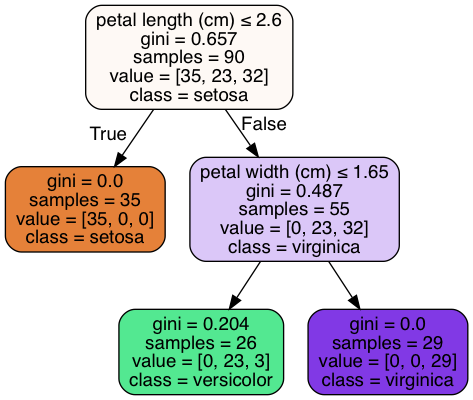

In [11]:
from subprocess import call

from IPython.display import Image
Image(filename = 'decision_tree Image/tree.png')